---
authors:
    - MB
    - JR
---

# In-situ Chlorophyll a concentrations

## General information about this notebook

This notebook series has been initiated by the Data Management Project (INF) within the TR-172 ["ArctiC Amplification: Climate Relevant Atmospheric and SurfaCe Processes, and Feedback Mechanisms" (AC)³](http://www.ac3-tr.de/) funded by the German Research Foundation (Deutsche Forschungsgemeinschaft, DFG)

Author(s) of this notebook:

- *Matthias Buschmann*, [*Institute of Environmental Physics*](http://www.iup.uni-bremen.de), *University of Bremen*, *Germany*, *m_buschmann@iup.physik.uni-bremen.de*
- *Johannes Röttenbacher*, [*Institute of Environmental Physics*](http://www.iup.uni-bremen.de), *University of Bremen*, *Germany*, *jroettenbacher@iup.physik.uni-bremen.de*

GitHub repository: https://github.com/ac3-tr/ac3-book

This notebook is licensed under the [Creative Commons Attribution 4.0 International](http://creativecommons.org/licenses/by/4.0/ "CC-BY-4.0")

**Setup instructions for a reference Python Environment can be found on the [GitHub page](https://github.com/ac3-tr/ac3-notebooks)**

## Dataset resources

**Title:** Global data sets of Chlorophyll "a" concentration for diatoms, coccolithophores (haptophytes) and cyanobacteria obtained from in situ observations and satellite retrievals    

**Authors:** Losa, Svetlana; Soppa, Mariana A; Dinter, Tilman; Wolanin, Aleksandra; Brewin, Robert J W; Bricaud, Annick; Oelker, Julia; Peeken, Ilka; Gentili, Bernard; Rozanov, Vladimir V; Bracher, Astrid

**Year:** 2017

**DOI:** https://doi.org/10.1594/PANGAEA.873210

**License:**    [Creative Commons Attribution 3.0 Unported](http://creativecommons.org/licenses/by/3.0/ "CC-BY-3.0")

**Linked Publication:** Losa, S et al. (2017): Synergistic Exploitation of Hyper- and Multi-Spectral Precursor Sentinel Measurements to Determine
Phytoplankton Functional Types (SynSenPFT). Frontiers in Marine Science, 4(203), 22 pp, https://doi.org/10.3389/fmars.2017.00203

## Data set Abstract

We derive the chlorophyll a concentration (Chla) for three main phytoplankton functional types (PFTs) --diatoms, coccolithophores and cyanobacteria- by combining satellite multispectral-based information, being of a high spatial and temporal resolution, with retrievals based on high resolution of PFT absorption properties derived from hyperspectral measurements. The multispectral-based PFT Chla retrievals are based on a revised version of the empirical OC-PFT algorithm (Hirata et al. 2011) applied to the Ocean Colour Climate Change Initiative (OC-CCI) total Chla product. The PhytoDOAS analytical algorithm (Bracher et al. 2009, Sadeghi et al. 2012) is used with some modifications to derive PFT Chla from SCIAMACHY hyperspectral measurements. To synergisticallycombine these two PFT products (OC-PFT and PhytoDOAS), an optimal interpolation is performed for each PFT in every OC-PFT sub-pixel within a PhytoDOAS pixel, given its Chla and its a priori error statistics. The synergistic product (SynSenPFT) is presented for the period of August 2002 ? March 2012 and evaluated against in situ HPLC pigment data and satellite information on phytoplankton size classes (PSC) (Brewin et al. 2010, Brewin et al. 2015) and the size fraction (Sf) by Ciotti and Bricaud (2006). The most challenging aspects of the SynSenPFT algorithm implementation are discussed. Perspectives on SynSenPFT product improvements and prolongation of the time series over the next decades by adaptation to Sentinel multi- and hyperspectral instruments are highlighted.

## Reading example data set

The data set mentioned above is a collection of three individual data sets. For this exercise we are using [](https://doi.org/10.1594/PANGAEA.875879).
The file containing in-situ datasets of Chlorophyll a can be opened via [pangaeapy](https://pypi.org/project/pangaeapy/).

In [1]:
import cartopy.crs as ccrs
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
from copy import copy
from pangaeapy import PanDataSet

%matplotlib inline

In [27]:
# adjust this to your local storage directory
cachedir = '/media/jr/JR_SSD/tmp/pangaeapy_cache'
ds = PanDataSet(875879, enable_cache=True, cachedir=cachedir)
data = ds.data
filename = ds.download()
data.head()

Dataset saved to /media/jr/JR_SSD/tmp/pangaeapy_cache/875879_data.csv


,Ord No,Date/Time,Latitude,Longitude,Depth water,TChl a,Chl a Diatoms,Chl a Haptophyta,Chl a Prokaryotes,Reference,Reference_2
0,1,2004-10-26,-8.40462,-141.23787,4.59000,0.33210,0.04730,0.12400,0.09580,MAREDAT,Peloquin et al. (2013)
1,2,2004-10-26,-8.39107,-141.23940,10.81500,0.36800,0.05930,0.13610,0.09680,MAREDAT,Peloquin et al. (2013)
2,3,2004-10-26,-8.39107,-141.23940,4.25000,0.36970,0.05860,0.13880,0.09960,MAREDAT,Peloquin et al. (2013)
3,4,2004-10-27,-8.36645,-141.27205,9.80900,0.28090,0.02650,0.10440,0.09000,MAREDAT,Peloquin et al. (2013)
4,5,2004-10-27,-8.36645,-141.27205,5.56300,0.27040,0.02360,0.09970,0.08880,MAREDAT,Peloquin et al. (2013)


We can plot the data on a map to get an idea of its distribution around the globe.

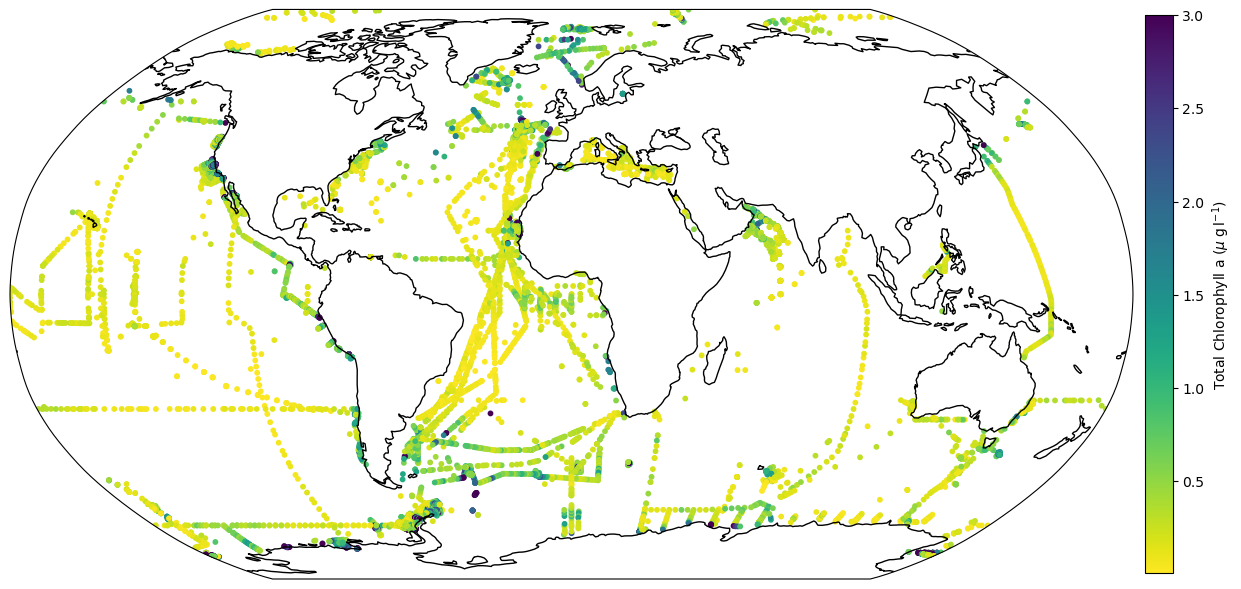

In [42]:
fig = plt.figure(figsize=(15, 8))
ax1 = fig.add_subplot(111, projection=ccrs.Robinson())
ax1.coastlines('110m')
palette = copy(plt.get_cmap('viridis_r'))
palette.set_bad('k', 0.0)
im = ax1.scatter(data.Longitude, data.Latitude, c=data['TChl a'], s=10, transform=ccrs.PlateCarree(), cmap=palette, vmax=3)
cb = fig.colorbar(im, ax=ax1, fraction=0.024, pad=0.01, label='Total Chlorophyll a ($\\mu$ g$\\,$l$^{-1}$)')